# 幅優先探索 (BFS)

グラフの探索手法の1つ。グラフ上のあるノードから開始し、開始ノードに近いノードから順に訪れる。

説明のため、次のグラフを用いる。

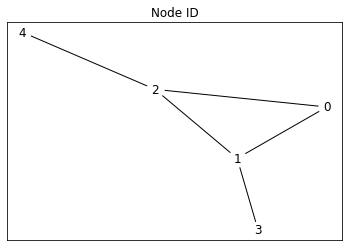

In [ ]:
import numpy
import networkx as nx
from networkx.generators.small import *
import matplotlib.pyplot as plt

G = bull_graph()
N = len(G)
numpy.random.seed(3)
pos = nx.spring_layout(G)

nx.draw_networkx(G, pos, with_labels=True, node_color='w')
ax = plt.title("Node ID")

## 単一始点最短経路

辺の重みがないグラフにおいては、あるノードからその他のノードへの最短距離がBFSで求まる。

In [2]:
from collections import deque

def bfs(N, G, start=0):
    q = deque()
    depth = [-1 for i in range(N)]
    prev = [-1 for i in range(N)]

    u = start
    depth[u] = 0
    q.append(u)

    while q:
        u = q.popleft()
        for v in G[u]:
            if depth[v] == -1:
                depth[v] = depth[u] + 1
                prev[v] = u
                q.append(v)
    return depth, prev

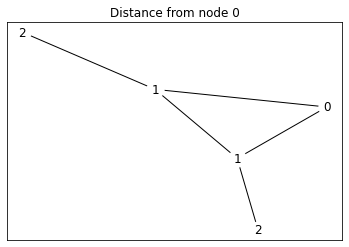

In [3]:
start = 0
depth, prev = bfs(N, G, start)

labels = dict(zip(range(N), depth))

nx.draw_networkx(G, pos, with_labels=True, labels=labels, node_color='w')
ax = plt.title("Distance from node %d" % start)

最短経路を出力するには、直前に訪れたノードの配列 `prev` を逆に辿ればよい。

In [4]:
def make_route(x, prev):
    route = [x]
    while prev[x] != -1:
        x = prev[x]
        route.append(x)
    return route

In [5]:
goal = 3
route = make_route(goal, prev)
print(route)

[3, 1, 0]


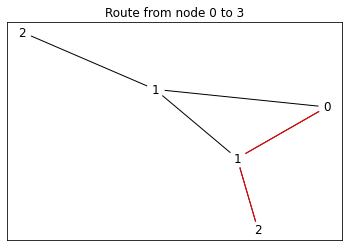

In [6]:
edgelist = list(zip(route[:-1], route[1:]))
nx.draw_networkx(G, pos, with_labels=True, labels=labels, node_color="w")
nx.draw_networkx_edges(G, pos, edgelist=edgelist, edge_color="r")
ax = plt.title("Route from node %d to %d" % (start, goal))